# U.S. Medical Insurance Costs
This project loads a CSV file with people's demographic information and medical insurance costs to anlyize the data. I chose to load the data into a custom data structure using [python dataclasses](https://docs.python.org/3/library/dataclasses.html) then build a wrapper object with analysis methods.

#### Sections
* [dataclass](#Dataclass)
* [wrapper object](#Object-with-analysis-methods)
* [analyze](#Analyze)
* [visualize](#Visualize)

### Imports

In [1]:
from collections import Counter
import csv
from dataclasses import asdict, dataclass
from matplotlib import pyplot as plt

### Dataclass
[to top](#U.S.-Medical-Insurance-Costs)

In [2]:
@dataclass(frozen=True)
class Person():
    """Class for holding a person's medical insurance cost data.
    """
    age: int
    sex: str
    bmi: float
    children: int
    smoker: str
    region: str
    charges: float
    
    @classmethod
    def from_dict(cls, row_dict):
        """Create a class object from a dictionary.
        
        The purpose of this method is to try building a classmethod
        """
        int_keys = ['age', 'children']
        for int_key in int_keys:
            try:
                row_dict[int_key] = int(row_dict[int_key])
            except KeyError as e:
                raise KeyError(f'missing {int_key}') from e
            except ValueError as e:
                raise ValueError(f'cannot convert {repr(row_dict[int_key])} to type int')

        float_keys = ['bmi', 'charges']
        for float_key in float_keys:
            try:
                row_dict[float_key] = float(row_dict[float_key])
            except KeyError as e:
                raise KeyError(f'missing {int_key}') from e
            except ValueError as e:
                raise ValueError(f'cannot convert {repr(row_dict[int_key])} to type float')

        return cls(**row_dict)
    
    @staticmethod
    def print_reminder() -> None:
        """Print reminder.
        
        The purpose of this method is to try building a static method
        """
        print('This data comes from people. Use with care.')
    
    @property
    def is_female(self) -> bool:
        return self.sex == 'female'
    
    @property
    def is_smoker(self) -> bool:
        return self.smoker == 'yes'
    
    def __str__(self) -> str:
        return f"Person is a {self.age} year old {self.sex}"

### Load CSV Data into a list of Person dataclass
[to top](#U.S.-Medical-Insurance-Costs)

In [3]:
people = []
with open('insurance.csv', newline='') as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv)
    for row in insurance_reader:
        people.append(Person.from_dict(row))

### Try Dataclass Methods
[to top](#U.S.-Medical-Insurance-Costs)

#### from_dict() - Class method

In [4]:
row_dict = {
    'age': 22,
    'sex': 'male',
    'bmi': '22.6',
    'children': 0,
    'smoker': 'yes',
    'region': 'northwest',
    'charges': " 12345.67 ",
}
person = Person.from_dict(row_dict)
person

Person(age=22, sex='male', bmi=22.6, children=0, smoker='yes', region='northwest', charges=12345.67)

#### default __init__()

In [5]:
person = Person(age=32, sex='female', bmi=20.4, children=1, smoker='no', region='southwest', charges=23451.67)

#### dataclasses.asdict()

In [6]:
asdict(person)

{'age': 32,
 'sex': 'female',
 'bmi': 20.4,
 'children': 1,
 'smoker': 'no',
 'region': 'southwest',
 'charges': 23451.67}

#### print_reminder() - Static method

In [7]:
Person.print_reminder()

This data comes from people. Use with care.


#### repr() 
This method is built by the dataclass decorator

In [8]:
repr(people[0])

"Person(age=19, sex='female', bmi=27.9, children=0, smoker='yes', region='southwest', charges=16884.924)"

#### str()

In [9]:
print(people[1])

Person is a 18 year old male


### Object with analysis methods
[to top](#U.S.-Medical-Insurance-Costs)

In [10]:
class Cohort():
    """Class for holding and analyzing a group of people's medical insurnace cost data.
    """
    def __init__(self, people):
        self.people=people
        self.n = len(people)

    def average_age(self):
        return sum(person.age for person in self.people)/self.n

    def sex_count(self, sex):
        return sum(person.sex == sex for person in self.people)

    def average_charges_per(self, categorical):
        unique_values = set(asdict(person)[categorical] for person in self.people)
        charges = {}
        for value in unique_values:
            group_charges = [person.charges for person in self.people if asdict(person)[categorical] == value]
            total  = sum(group_charges)
            n = len(group_charges)
            charges[value] = round(total/n, 2)
        return charges

    def counts_per(self, categorical):
        return Counter(asdict(person)[categorical] for person in self.people)

    def make_list_of(self, field):
        return [asdict(person)[field] for person in self.people]

cohort = Cohort(people)

In [11]:
Person(age='19', sex='female', bmi='27.9', children='0', smoker='yes', region='southwest', charges='16884.924')

Person(age='19', sex='female', bmi='27.9', children='0', smoker='yes', region='southwest', charges='16884.924')

### Analyze
[to top](#U.S.-Medical-Insurance-Costs)
#### Calculate the average age

In [12]:
avg_age = cohort.average_age()
int(avg_age)

39

#### Get the counts by sex

In [13]:
cohort.sex_count('female')

662

In [14]:
cohort.sex_count('male')

676

In [15]:
cohort.sex_count('intersex')

0

#### Get the averages charges for categorical variables

In [16]:
cohort.average_charges_per('sex')

{'male': 13956.75, 'female': 12569.58}

In [17]:
cohort.average_charges_per('smoker')

{'no': 8434.27, 'yes': 32050.23}

In [18]:
cohort.average_charges_per('region')

{'northwest': 12417.58,
 'northeast': 13406.38,
 'southeast': 14735.41,
 'southwest': 12346.94}

#### counts_per

In [19]:
cohort.counts_per('smoker')

Counter({'yes': 274, 'no': 1064})

### Visualize
[to top](#U.S.-Medical-Insurance-Costs)

#### Histogram
Examin the distribution of BMI in the population. It appears to be close to normally distibuted.

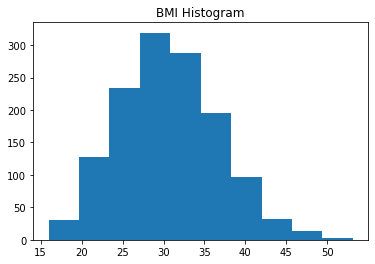

In [20]:
_ = plt.hist(cohort.make_list_of('bmi'))
_ = plt.title('BMI Histogram')
plt.show()

Take a second look with more bins. Still nearly normally distributed.

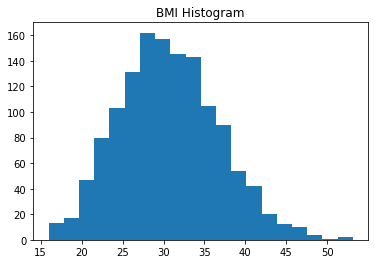

In [21]:
_ = plt.hist(cohort.make_list_of('bmi'), bins=20)
_ = plt.title('BMI Histogram')
plt.show()

#### Scatter Plot
Look at the relationship between age and BMI. The data appears to be more homoscedastic than I would expect. I would expect young people and older people to have a lower BMI range than people in the middle years. 

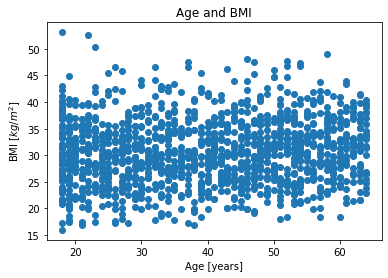

In [22]:
_ = plt.scatter(cohort.make_list_of('age'), cohort.make_list_of('bmi'))
_ = plt.title("Age and BMI")
_ = plt.xlabel("Age [years]")
_ = plt.ylabel('BMI [$kg/m^2$]')
plt.show()

#### Bar Plot
As expected there are fewer people with increasing numbers of children.

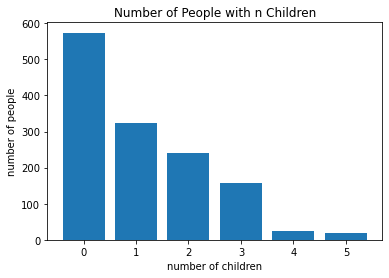

In [23]:
children_counts = cohort.counts_per('children')
x = children_counts.keys()
height = children_counts.values()

_ = plt.bar(x, height)
_ = plt.title("Number of People with n Children")
_ = plt.xlabel('number of children')
_ = plt.ylabel('number of people')
plt.show()

#### Box Plot
Age is evenly distibuted

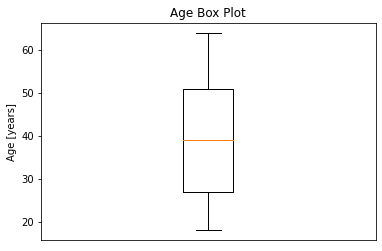

In [24]:
_ = plt.boxplot(cohort.make_list_of('age'))
_ = plt.title("Age Box Plot")
_ = plt.xticks([])
_ = plt.ylabel('Age [years]')